In [10]:
#module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import math
from sklearn.metrics import mean_squared_error

In [11]:
data_country = np.load('TopCountriesData.npy')
c_values = np.load('c_values.npy')
meta_params = np.array([[-2000,50],[-10000,200],[-2000,90]])

In [12]:
dataframe = pd.read_csv('out.csv',header=None)
data = dataframe.values
meta_data = data[:,16:21]

In [13]:
meta_data.shape

(616, 5)

In [14]:
sample_y = data_country[0][52:57]
sample_y

array([ 9.357552  ,  9.74986943,  9.99293834, 10.38046107, 10.68562484])

In [15]:
def meta_predictor(x_train,x_test,c,w_1,w_2):
    output=0
    for i in range(x_train.shape[0]):
        output+=c[i]*meta_kernel_formula(x_train[i],x_test,w_1,w_2)
    return output

def meta_kernel_formula(x_i,x_j,w_1,w_2):
    temp = np.square(np.linalg.norm(x_i-x_j))
    return w_1*np.exp(-w_2*temp)

In [16]:
pred_w1 = meta_predictor(meta_data,sample_y,c_values[0],meta_params[0][0],meta_params[0][1])
pred_w2 = meta_predictor(meta_data,sample_y,c_values[1],meta_params[1][0],meta_params[1][1])
pred_w3 = meta_predictor(meta_data,sample_y,c_values[2],meta_params[2][0],meta_params[2][1])

In [17]:
print(pred_w1,pred_w2,pred_w3)

0.0825089183198846 9.700712544264668e-07 1.8214168687655863e-05


In [18]:
meta_data.shape

(616, 5)

In [19]:
#do not touch this function
def kernel_formula(x_i,x_j,w_1,w_2,w_3):
    return np.power(x_i*x_j,w_1)+w_2*np.exp(-w_3*np.square(x_i-x_j))

def kernel_matrix_generator(x,w_1,w_2,w_3):
    kernel_matrix = np.zeros(shape=(x.shape[0],x.shape[0]))
    i=0
    for x_i in x:
        j=0
        for x_j in x:
            kernel_matrix[i,j] = kernel_formula(x_i,x_j,w_1,w_2,w_3)
            j+=1
        i+=1
    return kernel_matrix

#do not touch this function
def solver(x,y,gamma,w_1,w_2,w_3):
    kernel_matrix = kernel_matrix_generator(x,w_1,w_2,w_3)
    A = gamma*(kernel_matrix.shape[0])*np.identity(kernel_matrix.shape[0])
    A = np.add(A,kernel_matrix)
    B=y
    c = np.linalg.solve(A,B)
    return c

#do not touch this function
def predictor(x_train,x_test,y_train,gamma,w_1,w_2,w_3):
    c = solver(x_train,y_train,gamma,w_1,w_2,w_3)
    output = np.zeros(shape=(x_test.shape[0]))
    for j in range(x_test.shape[0]):
        for i in range(x_train.shape[0]):
            output[j]+=c[i]*kernel_formula(x_train[i],x_test[j],w_1,w_2,w_3)
    return output

In [20]:
prediction_for_27_days = predictor(np.arange(1,6),np.arange(1,10),sample_y,0.001,pred_w1,pred_w2,pred_w3)

In [21]:
prediction_for_27_days

array([ 9.25282995,  9.79743109, 10.13074314, 10.37408628, 10.56685601,
       10.72701636, 10.86432242, 10.98468215, 11.09195326])

In [22]:
data_country[0][50:50+10]

array([ 8.24317398,  8.98013958,  9.357552  ,  9.74986943,  9.99293834,
       10.38046107, 10.68562484, 10.97584797, 11.22219114, 11.45891921])

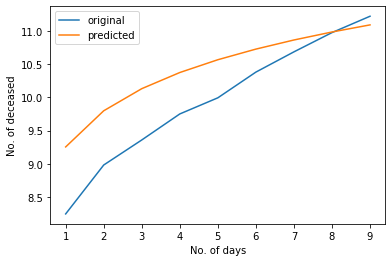

In [24]:
plt.plot(np.arange(1,10),data_country[0][50:50+9],label='original')
plt.plot(np.arange(1,10),prediction_for_27_days,label='predicted')
plt.legend()
plt.xlabel('No. of days')
plt.ylabel('No. of deceased')
plt.show()